#### Import required modules and load data file

In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [3]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(),fruits.fruit_name.unique()))
lookup_fruit_name

{np.int64(1): 'apple',
 np.int64(2): 'mandarin',
 np.int64(3): 'orange',
 np.int64(4): 'lemon'}

#### __Examining Data__

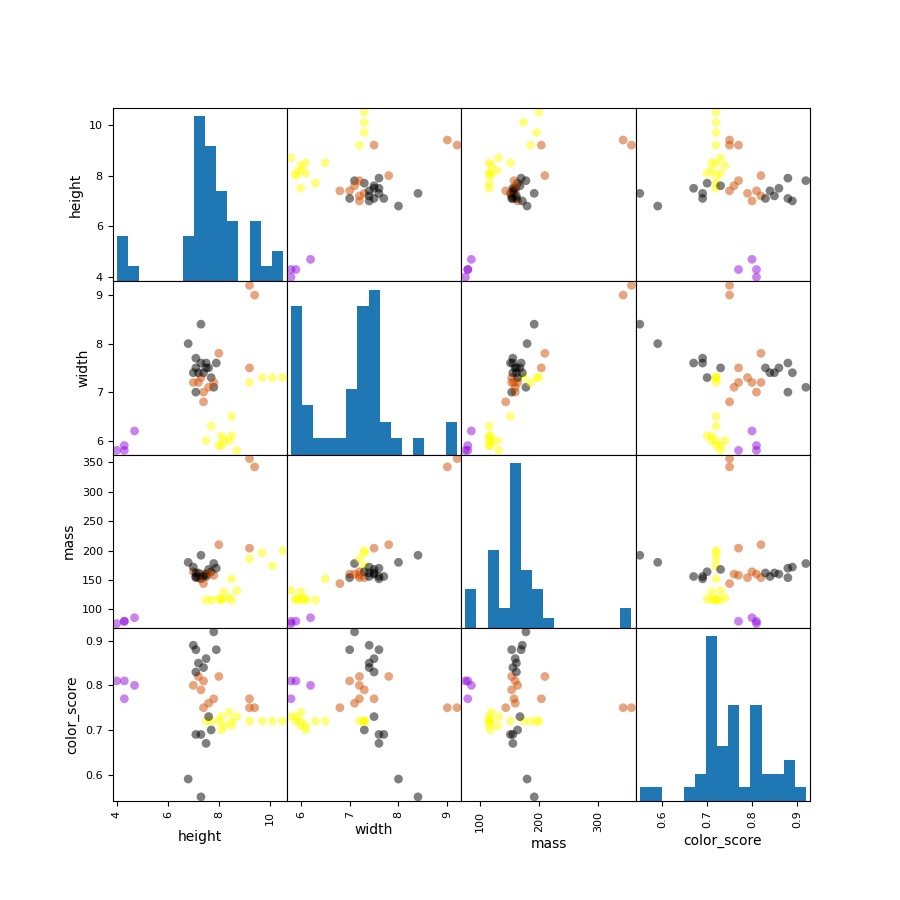

In [5]:
# plotting a scatter matrix
from matplotlib import cm

x = fruits[['height','width','mass','color_score']]
y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

cmap = plt.colormaps['gnuplot']
scatter = pd.plotting.scatter_matrix(X_train,c= y_train,marker='0',s=40,hist_kwds={'bins':15},figsize=(9,9),cmap=cmap)
plt.show()

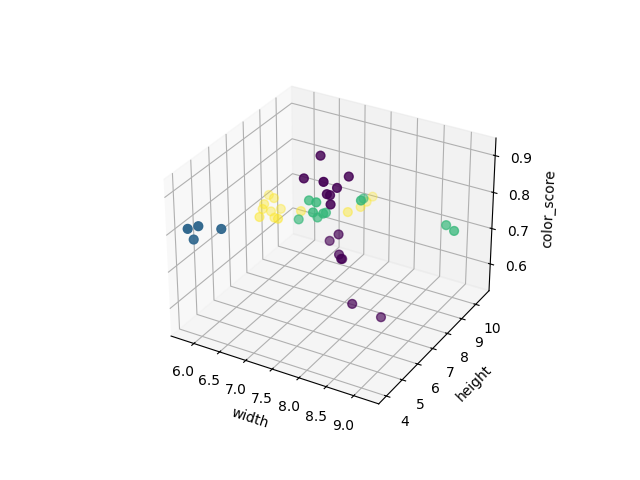

In [6]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'],c=y_train,marker='o',s=40)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

**Create Train Test**

In [7]:
# For this example, we use the mass, width, and height features of each fruit instance
x = fruits[['mass','width','height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=0)

**Create classifier object**

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

**Train the classifier (i.e fit the estimator) using the training data**

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Estimate the accuracy of the classifier on future data, using the test data**

In [10]:
knn.score(X_test,y_test)

0.5333333333333333

**Use the trained k-NN classifier model to classify new, previously unseen objects**

In [11]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_predictor = knn.predict([[20,4.3,5.5]])
lookup_fruit_name[fruit_predictor[0]]

/Users/apple/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [12]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_predictor = knn.predict([[100,6.3,8.5]])
lookup_fruit_name[fruit_predictor[0]]

/Users/apple/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'lemon'

**Plot the decision boundaries of the k-NN classifier**

/Users/apple/myenv/lib/python3.12/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


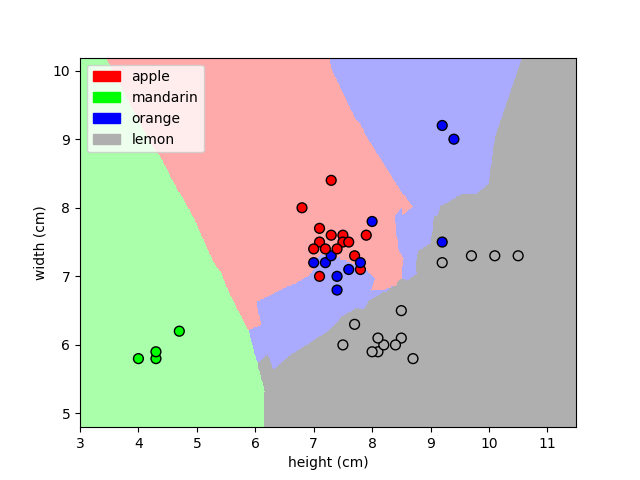

In [13]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform') # choose 5 nearest neighbour

**How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?**

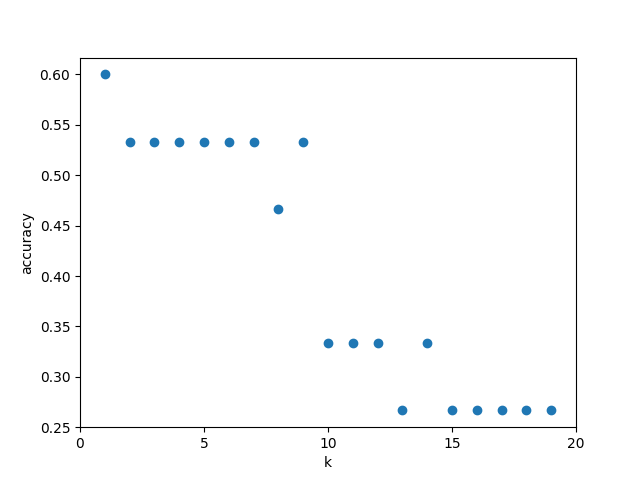

In [14]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    score = knn.score(X_test,y_test)
    scores.append(score)

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20]) ;   